In [421]:
!pip install geopandas

In [422]:
import json
import geopandas as gpd
import pandas as pd
import seaborn as sns
import random
import folium
import branca.colormap as cm
import copy

# Departments in [geojson data](https://hub.arcgis.com/datasets/juanespo::departamentos/about)

In [423]:
!wget https://www.arcgis.com/sharing/rest/content/items/1ddee8510feb4a4c936496a83f1315ea/data

--2021-10-02 23:27:36--  https://www.arcgis.com/sharing/rest/content/items/1ddee8510feb4a4c936496a83f1315ea/data
Resolving www.arcgis.com (www.arcgis.com)... 18.234.22.251, 34.199.206.244, 52.23.2.231, ...
Connecting to www.arcgis.com (www.arcgis.com)|18.234.22.251|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ago-item-storage.s3.us-east-1.amazonaws.com/1ddee8510feb4a4c936496a83f1315ea/departamentos.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKf%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJGMEQCIHX22XRv6dK0CDYzlBUjOzcPArqjNoSi%2FQsB6sV5ZxRZAiBPi5vsHymFOOE3taABlyVJBGCG2%2FEl0oviIY96YngpKir6AwgfEAAaDDYwNDc1ODEwMjY2NSIMJoNEN2Q1QTPOTyP%2FKtcDa5xEiHiKVSbgmqlSqRZkOWaZGPvkj906iaPVQwbNLTXYfn%2BckCRLzBry8%2BAbnk8Kk%2FYfcB3%2B%2FmAfsevfaDZKtJ1tCFEkL0FPpH7c1Hn7h0WFmczOQIKxvOFRq%2F4P3SOaT%2BMUF%2FXC17%2FFi%2B9weflH0H93yCvbXA3wusABrno3ghOrHT%2BLyCOBaRCCdNIzNv6Nf6XwsfdJ5aRRKhKHT6K1hsxa3CXTRe5ZBwJzQElfp%2F%2BZ86tdGu3plnvjvMTVA1Mme2fRBhUOP8x0RUZy1bHmwZ%2BmnSOLX

In [424]:
departments = "sample_data/departamentos.geojson"
# Opening JSON file
f = open(departments,)
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [425]:
for i in data:
    print(i)
print(data["type"])
print(data["name"])
print(data["crs"])
print(data["features"][0:1])

for i in features[0:3]:
  print(i)

type
name
crs
features
FeatureCollection
3de69c63-1a5b-4d0a-b924-40d3e5c62e2b202046-1-8i7r9q.wzl75
{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}
[{'type': 'Feature', 'properties': {'FID': 1, 'ID_ESPACIA': '11', 'AREA_OFICI': 1605, 'NOMBRE_DPT': 'BOGOTÁ'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-74.0696436581778, 4.82983260498634], [-74.0694575540154, 4.82981708637489], [-74.0692889209605, 4.8298270366282], [-74.0689763652432, 4.82989925448052], [-74.0686932036631, 4.83001785170221], [-74.0685371149162, 4.83010269401866], [-74.0682822268923, 4.83026902601664], [-74.0680977428917, 4.83040976981371], [-74.0678163215647, 4.83065473095337], [-74.0675030694803, 4.83096463015788], [-74.0662745005007, 4.83234929089392], [-74.0658393582815, 4.83280905362554], [-74.0655350959848, 4.83309977904961], [-74.0652741481101, 4.83332617879261], [-74.0648585304576, 4.83364108691027], [-74.0646311234869, 4.83378888859988], [-74.0643353935925, 4.83395444509686], [-74.

In [426]:
features = data["features"]
print(len(features))

33


In [427]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


df_places = gpd.read_file(departments)

In [428]:
df_places.info

<bound method DataFrame.info of     FID  ...                                           geometry
0     1  ...  POLYGON ((-74.06964 4.82983, -74.06946 4.82982...
1     2  ...  POLYGON ((-75.25600 10.79971, -75.25547 10.799...
2     3  ...  POLYGON ((-72.15949 7.04211, -72.15852 7.04148...
3     4  ...  POLYGON ((-74.67036 5.77004, -74.66925 5.76905...
4     5  ...  POLYGON ((-74.78494 2.92441, -74.78492 2.89536...
5     6  ...  POLYGON ((-76.44672 3.31708, -76.44614 3.31687...
6     7  ...  POLYGON ((-73.39171 10.86598, -73.39168 10.865...
7     8  ...  POLYGON ((-75.87806 9.42309, -75.87627 9.42305...
8     9  ...  POLYGON ((-74.31495 5.80046, -74.31410 5.80039...
9    10  ...  POLYGON ((-77.36540 8.67342, -77.36437 8.67305...
10   11  ...  POLYGON ((-74.51814 3.82550, -74.51267 3.82439...
11   12  ...  POLYGON ((-71.66600 12.45679, -71.66572 12.456...
12   13  ...  POLYGON ((-74.04537 11.34946, -74.04339 11.349...
13   14  ...  POLYGON ((-71.07957 4.92497, -71.07850 4.92472...
14   15 

In [429]:
df_places.head(10)

,FID,ID_ESPACIA,AREA_OFICI,NOMBRE_DPT,geometry
0,1,11,1605,BOGOTÁ,"POLYGON ((-74.06964 4.82983, -74.06946 4.82982..."
1,2,13,26383,BOLÍVAR,"POLYGON ((-75.25600 10.79971, -75.25547 10.799..."
2,3,15,23189,BOYACÁ,"POLYGON ((-72.15949 7.04211, -72.15852 7.04148..."
3,4,17,7888,CALDAS,"POLYGON ((-74.67036 5.77004, -74.66925 5.76905..."
4,5,18,88965,CAQUETÁ,"POLYGON ((-74.78494 2.92441, -74.78492 2.89536..."
5,6,19,29308,CAUCA,"POLYGON ((-76.44672 3.31708, -76.44614 3.31687..."
6,7,20,22905,CESAR,"POLYGON ((-73.39171 10.86598, -73.39168 10.865..."
7,8,23,26506,CÓRDOBA,"POLYGON ((-75.87806 9.42309, -75.87627 9.42305..."
8,9,25,22605,CUNDINAMARCA,"POLYGON ((-74.31495 5.80046, -74.31410 5.80039..."
9,10,27,46530,CHOCÓ,"POLYGON ((-77.36540 8.67342, -77.36437 8.67305..."


In [430]:
processed = copy.deepcopy(df_places)

Organizing names to lower case and without white spaces


In [432]:
# to-lowercase

# import required module

processed = processed.applymap(lambda s: s.lower() if type(s) == str else s)

processed.NOMBRE_DPT = processed.NOMBRE_DPT.str.replace(" ", "")

a,b = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
tildes = str.maketrans(a,b)

processed.NOMBRE_DPT = processed.NOMBRE_DPT.str.translate(tildes)

df_places.geometry = processed["geometry"]

df_places.head(20)

,FID,ID_ESPACIA,AREA_OFICI,NOMBRE_DPT,geometry
0,1,11,1605,BOGOTÁ,"POLYGON ((-74.06964 4.82983, -74.06946 4.82982..."
1,2,13,26383,BOLÍVAR,"POLYGON ((-75.25600 10.79971, -75.25547 10.799..."
2,3,15,23189,BOYACÁ,"POLYGON ((-72.15949 7.04211, -72.15852 7.04148..."
3,4,17,7888,CALDAS,"POLYGON ((-74.67036 5.77004, -74.66925 5.76905..."
4,5,18,88965,CAQUETÁ,"POLYGON ((-74.78494 2.92441, -74.78492 2.89536..."
5,6,19,29308,CAUCA,"POLYGON ((-76.44672 3.31708, -76.44614 3.31687..."
6,7,20,22905,CESAR,"POLYGON ((-73.39171 10.86598, -73.39168 10.865..."
7,8,23,26506,CÓRDOBA,"POLYGON ((-75.87806 9.42309, -75.87627 9.42305..."
8,9,25,22605,CUNDINAMARCA,"POLYGON ((-74.31495 5.80046, -74.31410 5.80039..."
9,10,27,46530,CHOCÓ,"POLYGON ((-77.36540 8.67342, -77.36437 8.67305..."


Remove empty spaces

In [433]:
geom = df_places["geometry"]
geom = geom[df_places.geometry!=None]
geom

0     POLYGON ((-74.06964 4.82983, -74.06946 4.82982...
1     POLYGON ((-75.25600 10.79971, -75.25547 10.799...
2     POLYGON ((-72.15949 7.04211, -72.15852 7.04148...
3     POLYGON ((-74.67036 5.77004, -74.66925 5.76905...
4     POLYGON ((-74.78494 2.92441, -74.78492 2.89536...
5     POLYGON ((-76.44672 3.31708, -76.44614 3.31687...
6     POLYGON ((-73.39171 10.86598, -73.39168 10.865...
7     POLYGON ((-75.87806 9.42309, -75.87627 9.42305...
8     POLYGON ((-74.31495 5.80046, -74.31410 5.80039...
9     POLYGON ((-77.36540 8.67342, -77.36437 8.67305...
10    POLYGON ((-74.51814 3.82550, -74.51267 3.82439...
11    POLYGON ((-71.66600 12.45679, -71.66572 12.456...
12    POLYGON ((-74.04537 11.34946, -74.04339 11.349...
13    POLYGON ((-71.07957 4.92497, -71.07850 4.92472...
14    POLYGON ((-78.14140 2.67691, -78.14140 2.67202...
15    POLYGON ((-73.00339 9.28749, -73.00328 9.28744...
16    POLYGON ((-75.66522 4.70053, -75.66044 4.69892...
17    POLYGON ((-76.00835 5.56453, -76.00825 5.5

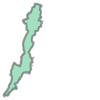

In [434]:
df_places.geometry[0]

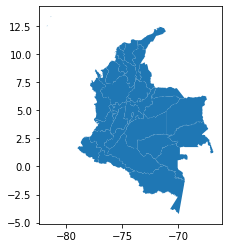

In [435]:
df_places.geometry.plot()

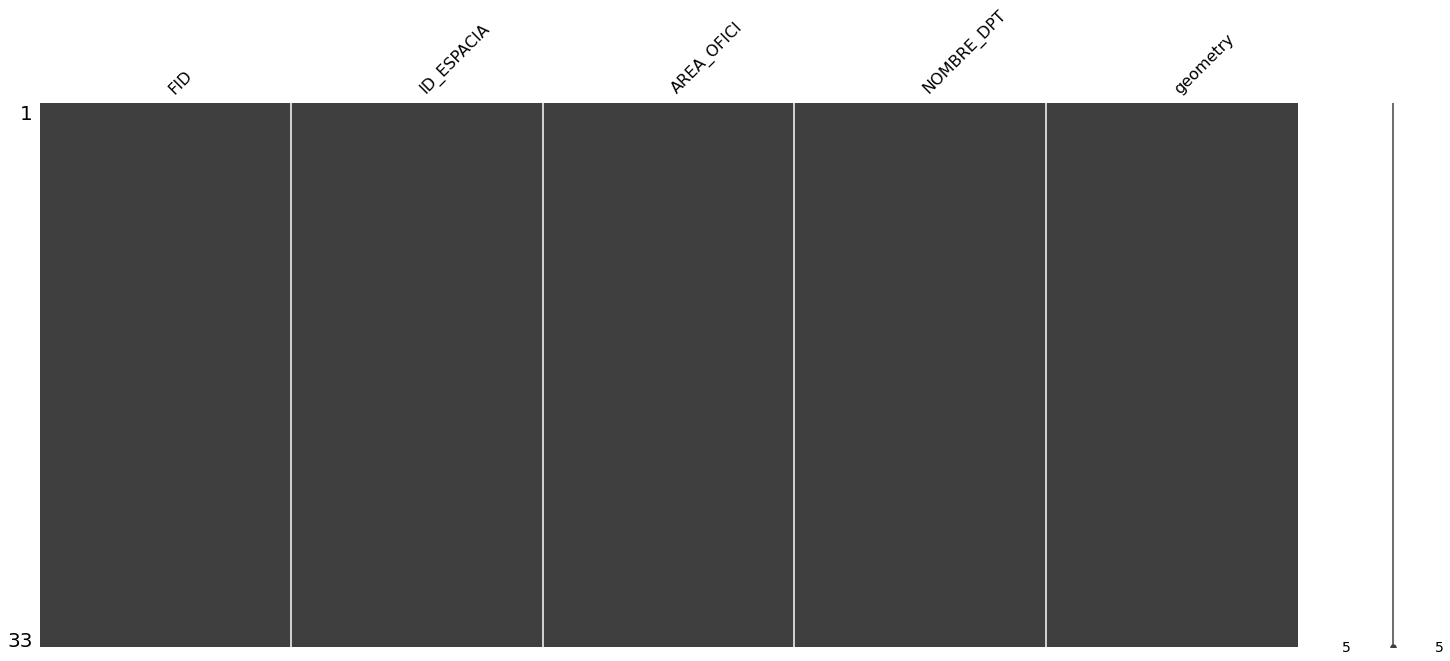

In [436]:
import missingno as msno

msno.matrix(msno.nullity_sort(df_places, sort='descending'))

### Fast prototype for risk calculation

In [438]:
# df_places["risk"] = [np.round(random.uniform(0, 1)) for i in df_places["risk"] ]
df_places["risk"] = 0
df_places["risk"] = [np.round(random.uniform(0, 3)) for i in df_places["risk"] ]

df_places.groupby("risk").count()

,FID,ID_ESPACIA,AREA_OFICI,NOMBRE_DPT,geometry
risk,,,,,
0.0,5,5,5,5,5
1.0,12,12,12,12,12
2.0,13,13,13,13,13
3.0,3,3,3,3,3


In [439]:
df_places["risk"].head(5)

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: risk, dtype: float64

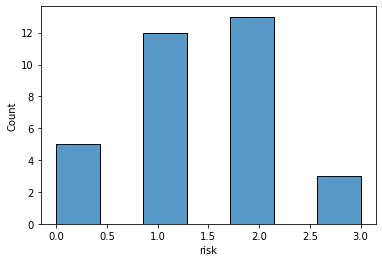

In [440]:
sns.histplot(df_places['risk'])

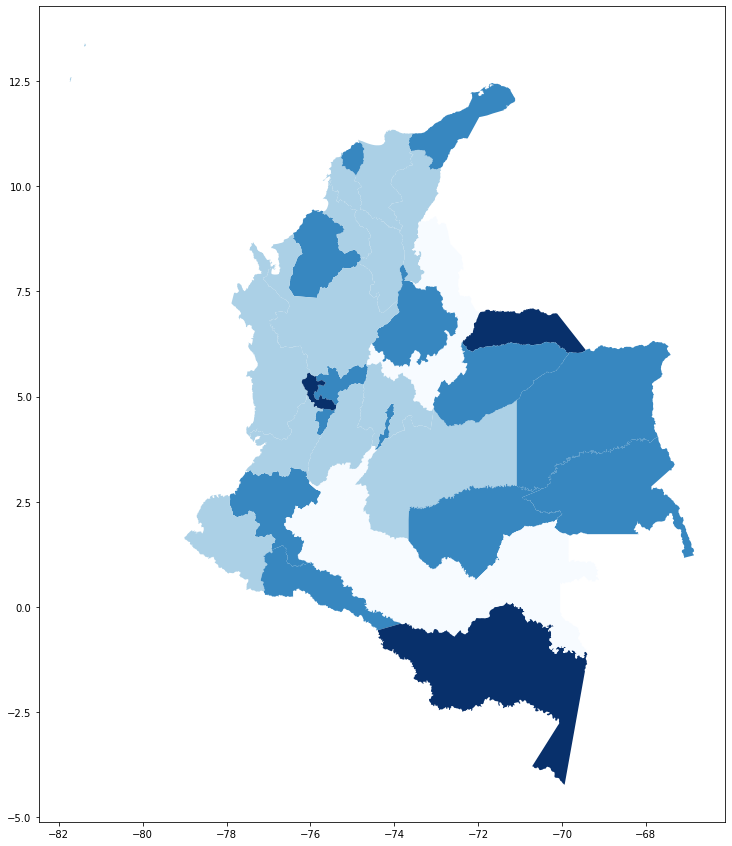

In [441]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = df_places.plot(column='risk', cmap='Blues' ,ax=ax)
#ax.set_xlim([-1000, 1000])
#ax.set_ylim([2000, 0])
plt.show()

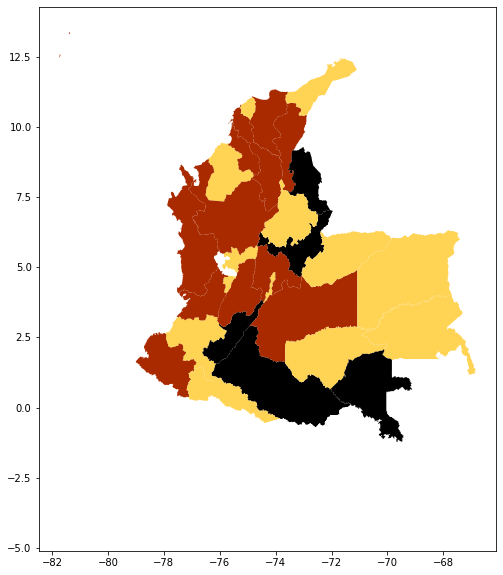

In [442]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = df_places.plot(column='risk', cmap='afmhot' ,ax=ax)
plt.show()

In [448]:
!pip install geojson

import geojson
with open("departments_and_risk.geosjon", 'w') as outfile:
     geojson.dump(df_places, outfile)